In [40]:
#Import Library
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pickle

style.use("ggplot")

data = pd.read_csv("student-mat.csv", sep=";")

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [41]:
# Label: G3 (is what we're trying to get / what we're looking for)
# G3 is the final scores of student in 3 Grade.
predict = "G3"

# We cut down our df to following attributes:
data = data[["G1", "G2", "absences","failures", "studytime","G3"]]
data = shuffle(data) # Optional - shuffle the data

# Attributes
x = np.array(data.drop([predict], 1))
# Labels
y =np.array(data[predict]) 


<AxesSubplot:>

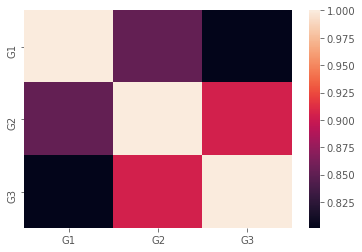

In [51]:
# Attributes --> Labels (Training)
# Attributes --> ?      (Testing)
# split up 10% of data into test samples
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)


### NUMERICAL ANALYSIS ###
x_df = data.drop([predict], 1)
y_df = data[predict]
df_num = data[['G1','G2',"G3"]]
df_cat = data[["absences","failures", "studytime"]]
sns.heatmap(df_num.corr())

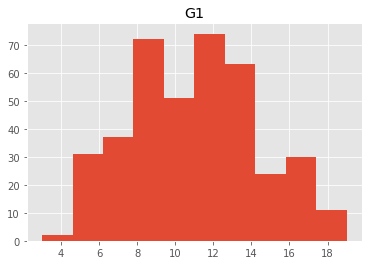

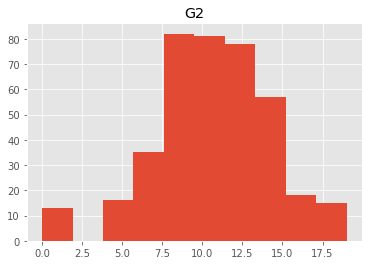

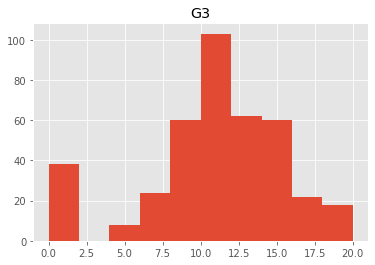

In [50]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

C:\Users\alkat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


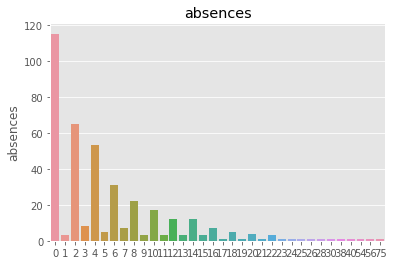

C:\Users\alkat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


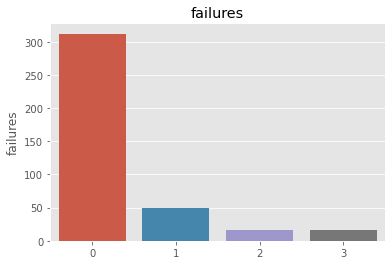

C:\Users\alkat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


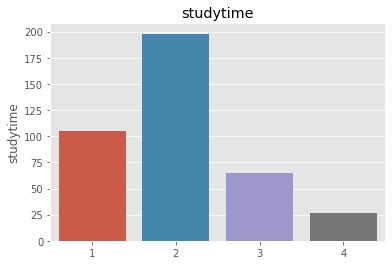

In [52]:
### Categorical Analysis ###
# Show Distributions for all categorical variables / columns
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index, df_cat[i].value_counts()).set_title(i)
    plt.show()

No handles with labels found to put in legend.


Accuracy: 0.5866324062897985
Accuracy: 0.8364514253412505
Accuracy: 0.8422289959805951
Accuracy: 0.8483722264696976
Accuracy: 0.8308047614798494
Accuracy: 0.7509135746760264
Accuracy: 0.711242395914672
Accuracy: 0.867834035343823
Accuracy: 0.8298997965268892
Accuracy: 0.874614654942594
Accuracy: 0.6843234853228777
Accuracy: 0.8804877980395349
Accuracy: 0.7859432335212804
Accuracy: 0.774730019906687
Accuracy: 0.8910069702876313
Accuracy: 0.9101003403592323
Accuracy: 0.8378482402322229
Accuracy: 0.748285513383966
Accuracy: 0.9040887421974603
Accuracy: 0.8286904430323361
______________________________________

Coefficient in 5D-Space:  [ 0.14929275  0.98669119  0.03786191 -0.27234744 -0.21284321]
Intercept:  -1.5253738110370882
______________________________________

Predicted Final Grade - Input Data - Actual Final Grade
6.327256328794325 [7 7 3 0 1] 8
11.886999055538293 [14 11 18  0  1] 13
8.274950167241775 [8 9 4 0 2] 10
11.296419302083828 [ 8 12  0  0  1] 12
3.392961591315303 [6 5 0 1

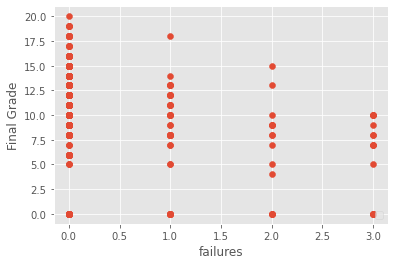

In [2]:
# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE
best = 0
for _ in range(20):
    # split df up
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
    # choose model
    linear = linear_model.LinearRegression()
    # train model
    linear.fit(x_train, y_train)
    # test & return accuracy
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    # save our new model if the current score better than the previous one that we've seen.
    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

# LOAD pickle into our linear model
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)


print("______________________________________\n")
print('Coefficients / Slopes in 5D-Space: ', linear.coef_) # how fast our line increases.
print('Intercept: ', linear.intercept_)
print("______________________________________\n") 
# intercept; where our line on Y starts.
# slope = (y2 – y1) / (x2 – x1)

# We're gonna use our model to predict y_test 
# by feeding machine with x_test
predicted = linear.predict(x_test)
# Show Input Data & predictions

print("Predicted Final Grade - Input Data - Actual Final Grade")
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])


# Drawing and plotting model
plot = "failures"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

#"G1", "G2", "absences","failures", "studytime",

In [45]:
# Building a model using a polynomial function
# First Step is to seperate Attributes from Lables
# Attributes
x = np.array(data.drop([predict], axis=1))
# Labels
y =np.array(data[predict])

# Introduction of Polynomial Featuers 
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=3)

# Converter "fits" to data, in this case, reads in every X column
# Then it "transforms" and ouputs the new polynomial data
poly_features = polynomial_converter.fit_transform(x)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(poly_features, y, test_size=0.1)


In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

# We evaluate its performance on the test set
# Testing our model
test_predictions = model.predict (x_test) #polynomial_converter.fit_transform(x_test)

# model.coef_

In [47]:
# Polynomial Regression is better than linear Regression because:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE) # root mean squared error

In [48]:
MAE

2.000111436843872

In [49]:
MSE

15.64013903549594

In [50]:
RMSE

3.954761564936114

In [43]:
data['G3'].mean()

10.415189873417722

In [21]:
### Regularization with SciKit-Learn ###

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("student-mat.csv", sep=";")

# We cut down our df to following attributes:
df = df[["G1", "G2", "absences","failures", "studytime","G3"]]

# Attributes
X = df.drop(["G3"], axis=1)
# Labels
y =df["G3"]


In [22]:
# Create the Polynomial Feature Set
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)
poly_features = polynomial_converter.fit_transform(X)
X.shape

(395, 5)

In [23]:
# poly_features include not just the original terms 
# but also interaction (higher degree) Terms
poly_features.shape

(395, 20)

In [24]:
# Train | Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.1)


In [25]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[0]

array([ 2.1801074 ,  1.46329902, -0.71465103, -0.46337631,  1.15053101,
        2.61464798,  2.17686421, -0.71940815, -0.4675205 ,  2.44237801,
        1.72767487, -0.7371801 , -0.44996336,  1.97695309, -0.25114116,
       -0.333327  , -0.67764573, -0.35857453, -0.44925713,  1.0577742 ])

In [26]:
poly_features[0]

array([ 5.,  6.,  6.,  0.,  2., 25., 30., 30.,  0., 10., 36., 36.,  0.,
       12., 36.,  0., 12.,  0.,  0.,  4.])

In [27]:
### Ridge Regression ###
# helps by reducing the potential for overfitting to the training data
# it does this by adding in a "Penalty Term" to the error that is 
# based on the squared value of the coefficients.

from sklearn.linear_model import Ridge

# using the cross validation method we're gonna show later 
# why 10 is the best alpha value that we can choose
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train,y_train)
# help(Ridge)

Ridge(alpha=1)

In [28]:
test_predictions = ridge_model.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [29]:
MAE

1.1982532492605362

In [30]:
RMSE

1.9332720401387817

In [31]:
from sklearn.linear_model import RidgeCV # Ridge with cross validation
# RidgeVC is gonna perform a cross validation for a variety of alpha values
# and then it is gonna report back the best alpha value performance

# See all options: sklearn.metrics.SCORERS.keys()
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')


In [32]:
# The more alpha options you pass, the longer this will take.
# Fortunately our data set is still pretty small
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [33]:
# the alpha that did the best is:
ridge_cv_model.alpha_

0.1

In [34]:
test_predictions = ridge_cv_model.predict(X_test)

MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [35]:
MAE

1.241200538156996

In [36]:
RMSE

1.9574379260919614

In [ ]:
# using the cross validation to determine the best alpha, 
# has improved the Results slightly now

In [37]:
ridge_cv_model.coef_

array([ 0.4750282 ,  3.44455492,  1.94283909, -1.99389071, -0.34232484,
        2.67357497, -5.38585156,  0.06043811,  0.33203071, -0.66301224,
        2.82418203, -1.49850151,  0.20723506,  1.34538529, -0.87861077,
        0.08842517,  0.59872747,  1.36020439, -0.07297938, -0.36010142])